In [353]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,\
    classification_report

import joblib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [354]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
y_test = pd.read_csv("data/gender_submission.csv")

____
Data exploration

In [355]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [356]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [357]:
df_train.info()      
df_train.describe() 
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

____
Feature extraction
(Excluding sensitive data like for example Cabin number, Passenger ID and name)

In [358]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

____
Preparing train och test datasets

In [359]:
train = df_train[features + ["Survived"]].copy()

In [360]:
# Filling Null values in Age with its median
train['Age'] = train['Age'].fillna(train['Age'].median())

In [361]:
# Filling Null values in Embark with the most common port
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [362]:
# Encoding Sex and Embarked into binary categories
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

In [363]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [364]:
test = df_test[features].copy()

# Handling missing values using training data statistics
test['Age'] = test['Age'].fillna(df_train['Age'].median())        # Using original training median
test['Fare'] = test['Fare'].fillna(df_train['Fare'].median())    # Filling missing fare
test['Embarked'] = test['Embarked'].fillna(df_train['Embarked'].mode()[0])  # Use original training mode

# Applying same encoding as training data
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

In [365]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,True,False,True
414,1,39.0,0,0,108.9000,False,False,False
415,3,38.5,0,0,7.2500,True,False,True
416,3,28.0,0,0,8.0500,True,False,True


In [366]:
X_test = test

In [367]:
# Dropping PassengerId for referenece target
y_true = y_test.drop(columns="PassengerId")

____
Instantiating model and training it

In [368]:
model = RandomForestClassifier(n_estimators=50, random_state=42)

In [369]:
model.fit(X_train,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [370]:
predictions = model.predict(X_test)

____
Extracting the features and their importances and visualizing it

In [371]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

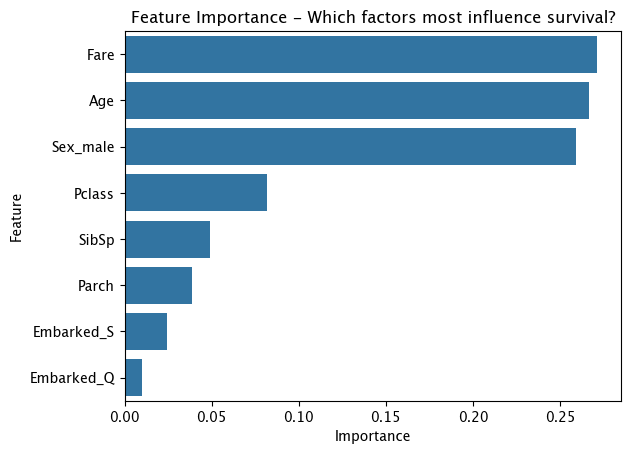

In [372]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Which factors most influence survival?')
plt.show()

___
Calculating scores

In [373]:
# (True Positives + True Negatives) / Total Predictions
accuracy_score = accuracy_score(predictions,y_true)

In [374]:
print(accuracy_score)

0.8205741626794258


In [375]:
cr = classification_report(predictions,y_true)

In [376]:
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       267
           1       0.75      0.75      0.75       151

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



Precision score = (True Positives / (True Positives + False Positives))

Recall score = (True Positives / (True Positives + False Negatives))

F1 score = (2 × (Precision × Recall) / (Precision + Recall))

In [377]:
joblib.dump(X_train.columns.tolist(), "rf_model_titanic_columns.joblib")
joblib.dump(model, 'rf_model_titanic.joblib')

['rf_model_titanic.joblib']